In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("Flag-close-and-missing.csv")
print("Data Loaded. Kolom yang ada:")
print(df.columns)

Data Loaded. Kolom yang ada:
Index(['Bulan', 'Tanggal', 'No', 'Ayam Potong (A.P)', 'Ayam Kampung (A.K)',
       'Ayam Tua (A.T)', 'Harga', 'is_close', 'is_missing', 'Keterangan',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')


In [13]:
cols_to_drop = ['No', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'is_close', 'is_missing', 'Keterangan']
df = df.drop(columns=cols_to_drop, errors='ignore')

print("\nStep 1 Completed: Columns cleaned")
print("Kolom setelah dibersihkan:")
print(df.columns)

print("\nPreview data:")
print(df.head())


Step 1 Completed: Columns cleaned
Kolom setelah dibersihkan:
Index(['Bulan', 'Tanggal', 'Ayam Potong (A.P)', 'Ayam Kampung (A.K)',
       'Ayam Tua (A.T)', 'Harga'],
      dtype='object')

Preview data:
     Bulan  Tanggal  Ayam Potong (A.P)  Ayam Kampung (A.K)  Ayam Tua (A.T)  \
0  JANUARI        1               0.00                0.00            0.00   
1  JANUARI        2               1.32                0.00            0.00   
2  JANUARI        2               0.00                0.00            8.06   
3  JANUARI        2               0.00                3.11            0.00   
4  JANUARI        2               5.95                0.00            0.00   

    Harga  
0       0  
1   45000  
2  266000  
3  218000  
4  202000  


In [14]:
bulan_map = {
    'JANUARI': 1, 'FEBRUARI': 2, 'MARET': 3, 'APRIL': 4,
    'MEI': 5, 'JUNI': 6, 'JULI': 7, 'AGUSTUS': 8,
    'SEPTEMBER': 9, 'OKTOBER': 10, 'NOVEMBER': 11, 'DESEMBER': 12
}
df['bulan_num'] = df['Bulan'].str.upper().map(bulan_map)

In [15]:
df['Tahun'] = 2024
df['date'] = pd.to_datetime(
    df[['Tahun', 'bulan_num', 'Tanggal']].rename(
        columns={'Tahun':'year', 'bulan_num':'month', 'Tanggal':'day'}
    )
)

In [18]:
df = df.sort_values('date').reset_index(drop=True)
df.head(10)


,Bulan,Tanggal,Ayam Potong (A.P),Ayam Kampung (A.K),Ayam Tua (A.T),Harga,bulan_num,Tahun,date
0,JANUARI,1,0.00,0.00,0.00,0,1,2024,2024-01-01
1,JANUARI,2,4.92,0.00,0.00,167000,1,2024,2024-01-02
2,JANUARI,2,0.00,0.00,5.31,175000,1,2024,2024-01-02
3,JANUARI,2,0.00,7.86,0.00,550000,1,2024,2024-01-02
4,JANUARI,2,0.00,3.17,0.00,222000,1,2024,2024-01-02
5,JANUARI,2,0.00,0.00,2.77,91000,1,2024,2024-01-02
6,JANUARI,2,8.09,0.00,0.00,275000,1,2024,2024-01-02
7,JANUARI,2,1.75,0.00,0.00,60000,1,2024,2024-01-02
8,JANUARI,2,5.95,0.00,0.00,202000,1,2024,2024-01-02
9,JANUARI,2,0.00,0.00,8.06,266000,1,2024,2024-01-02


In [19]:
df = df.drop(columns=['Bulan', 'Tanggal', 'bulan_num', 'Tahun'])
df.head()

,Ayam Potong (A.P),Ayam Kampung (A.K),Ayam Tua (A.T),Harga,date
0,0.00,0.00,0.00,0,2024-01-01
1,4.92,0.00,0.00,167000,2024-01-02
2,0.00,0.00,5.31,175000,2024-01-02
3,0.00,7.86,0.00,550000,2024-01-02
4,0.00,3.17,0.00,222000,2024-01-02


In [24]:
df = df.drop(columns=['Harga'], errors='ignore')
df_daily = df.groupby('date').agg({
    'Ayam Potong (A.P)': 'sum',
    'Ayam Kampung (A.K)': 'sum',
    'Ayam Tua (A.T)': 'sum'
}).reset_index()

df_daily.head(10)

,date,Ayam Potong (A.P),Ayam Kampung (A.K),Ayam Tua (A.T)
0,2024-01-01,0.00,0.00,0.00
1,2024-01-02,23.12,14.14,16.14
2,2024-01-03,12.76,16.40,5.20
3,2024-01-04,37.04,11.82,8.73
4,2024-01-05,64.36,0.00,9.69
5,2024-01-06,22.61,3.00,6.79
6,2024-01-07,33.78,8.10,2.34
7,2024-01-08,13.49,8.36,10.13
8,2024-01-09,49.16,6.69,3.38
9,2024-01-10,32.86,14.56,29.61


In [29]:
ts_AP = df_daily[['date','Ayam Potong (A.P)']].set_index('date')
ts_AK = df_daily[['date','Ayam Kampung (A.K)']].set_index('date')
ts_AT = df_daily[['date','Ayam Tua (A.T)']].set_index('date')

In [30]:
ts_AP = ts_AP.asfreq('D').fillna(0)
ts_AK = ts_AK.asfreq('D').fillna(0)
ts_AT = ts_AT.asfreq('D').fillna(0)

<Axes: xlabel='date'>

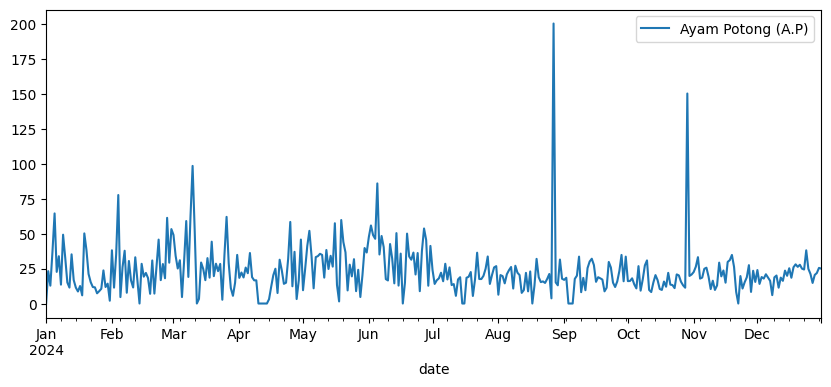

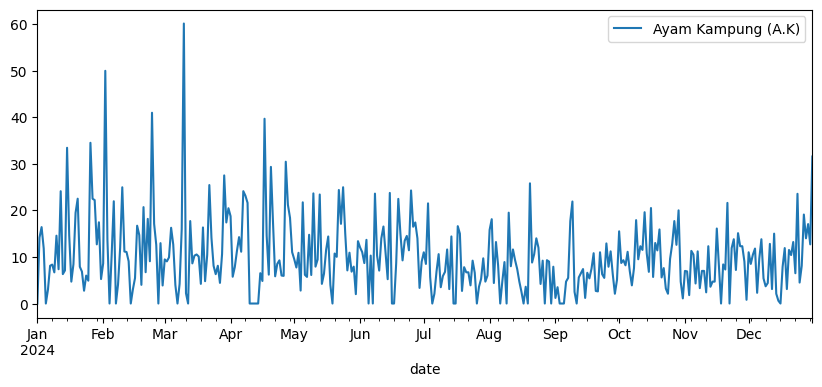

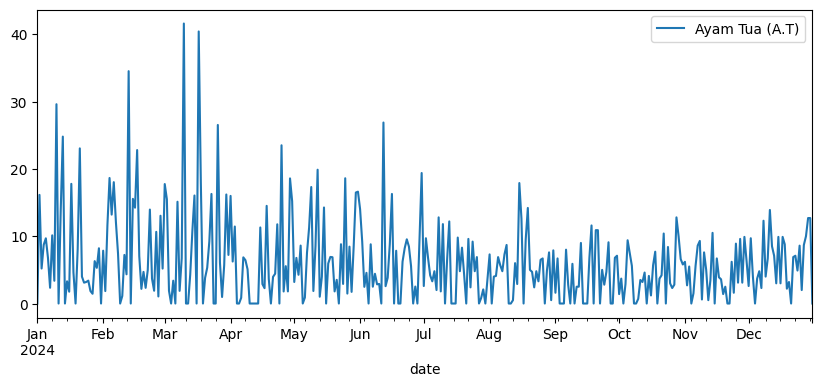

In [31]:
ts_AP.plot(figsize=(10,4))
ts_AK.plot(figsize=(10,4))
ts_AT.plot(figsize=(10,4))


In [33]:
ts_AP = df_daily['Ayam Potong (A.P)']
ts_AK = df_daily['Ayam Kampung (A.K)']
ts_AT = df_daily['Ayam Tua (A.T)']

def remove_outliers(series):
    series = series.astype(float)

    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series.clip(lower, upper)

In [34]:
ts_AP_clean = remove_outliers(ts_AP)
ts_AK_clean = remove_outliers(ts_AK)
ts_AT_clean = remove_outliers(ts_AT)

In [35]:
def check_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    outliers = series[(series < lower) | (series > upper)]
    return outliers

print("Outlier AP:", len(check_outliers(ts_AP_clean)))
print("Outlier AK:", len(check_outliers(ts_AK_clean)))
print("Outlier AT:", len(check_outliers(ts_AT_clean)))

Outlier AP: 0
Outlier AK: 0
Outlier AT: 0


In [36]:
print("AP sebelum:", ts_AP.min(), ts_AP.max())
print("AP sesudah:", ts_AP_clean.min(), ts_AP_clean.max())

print("AK sebelum:", ts_AK.min(), ts_AK.max())
print("AK sesudah:", ts_AK_clean.min(), ts_AK_clean.max())

print("AT sebelum:", ts_AT.min(), ts_AT.max())
print("AT sesudah:", ts_AT_clean.min(), ts_AT_clean.max())

AP sebelum: 0.0 200.0
AP sesudah: 0.0 53.675000000000004
AK sebelum: 0.0 60.1
AK sesudah: 0.0 27.39375
AT sebelum: 0.0 41.6
AT sesudah: 0.0 19.200000000000003


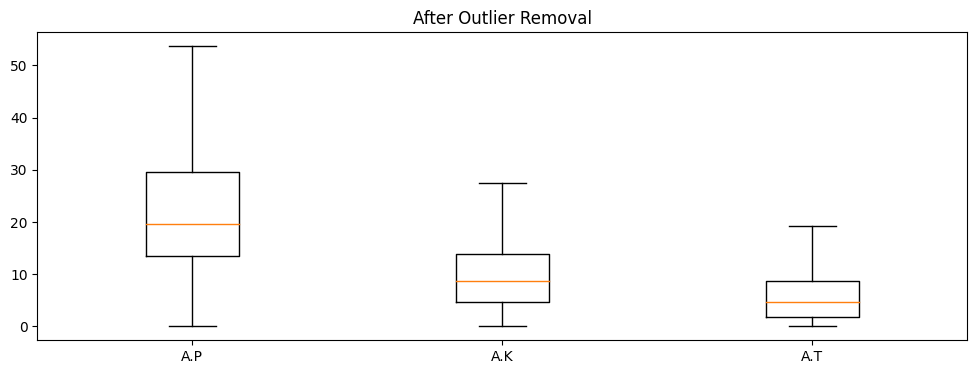

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.boxplot(
    [ts_AP_clean, ts_AK_clean, ts_AT_clean],
    labels=['A.P', 'A.K', 'A.T']
)
plt.title("After Outlier Removal")
plt.show()

In [42]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    result = adfuller(series)
    print(f"ADF Test for {name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("=> Data STASIONER\n")
    else:
        print("=> Data TIDAK stasioner, perlu differencing\n")

adf_test(ts_AP_clean, "Ayam Potong")
adf_test(ts_AK_clean, "Ayam Kampung")
adf_test(ts_AT_clean, "Ayam Tua")

ADF Test for Ayam Potong:
ADF Statistic: -5.7959563203245565
p-value: 4.751569883665312e-07
=> Data STASIONER

ADF Test for Ayam Kampung:
ADF Statistic: -5.2354824522626915
p-value: 7.438103325639547e-06
=> Data STASIONER

ADF Test for Ayam Tua:
ADF Statistic: -18.783099817579906
p-value: 2.024068844492365e-30
=> Data STASIONER

